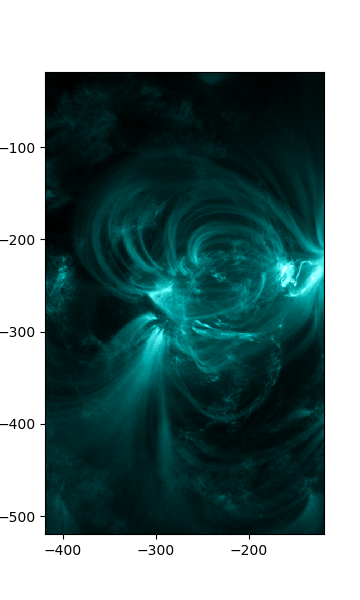

In [1]:
from InteractiveLoopTracer import *
from WideLoop import *
import numpy as np

%matplotlib widget

lines = [94, 131, 171, 193, 211, 304, 335]
images = os.listdir('../sunishot/images')

tmp = [sunpy.map.Map(f'../sunishot/images/{filename}') for filename in images if filename.find(f'{lines[2]}A') != -1]
aia_map = sunpy.map.Map(tmp, sequence=True)
x_grid = np.linspace(aia_map[0].bottom_left_coord.Tx.value, aia_map[0].top_right_coord.Tx.value, aia_map[0].data.shape[1])
y_grid = np.linspace(aia_map[0].bottom_left_coord.Ty.value, aia_map[0].top_right_coord.Ty.value, aia_map[0].data.shape[0])

tracer = WideLoop(aia_map.data[:,:,50], x_grid, y_grid)
tracer.show()

In [2]:
from TDPlotter import *
xin, yin = np.loadtxt('test_points.csv', delimiter=',').T

test_data = TDPlotter('../sunishot/images')

In [3]:
test_data.get_data(xin, yin, 11)

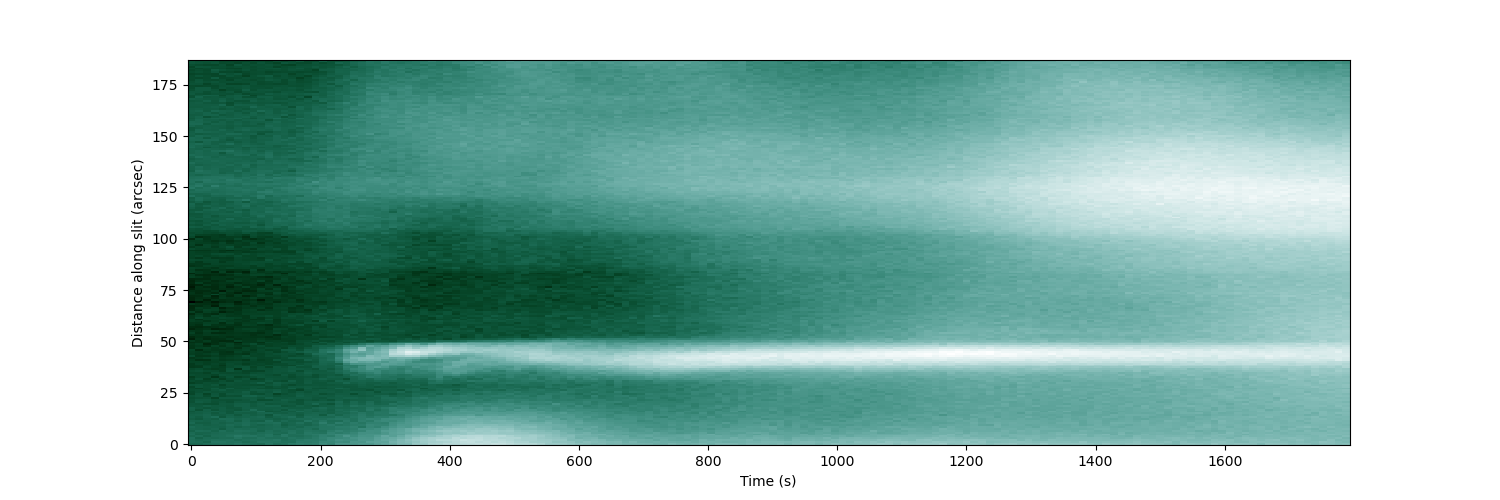

In [5]:
test_data.plot_td(94)

In [6]:
test_data.save_npz('res20131228')
test_data.save_txt('res20131228')